In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from matplotlib.lines import Line2D
import math

sys.path.append(str(Path("..").resolve()))
from src import *

/leonardo_scratch/fast/IscrC_MACRO/CalciumImagingDenoising/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# DCT vs FFT

In [9]:
DATASETS["synthetic"].dir

PosixPath('/leonardo_scratch/fast/IscrC_MACRO/CalciumImagingDenoising/dataset/zenodo/synthetic')

In [ ]:
import sys
sys.path.append("..")
from src import *
Recording(DATASETS["synthetic"].dir / "deepcad_E_10_test_patcht_30_test_150.tif", max_frames=2000).render(
    "best/y_30_150.mp4", codec="libx264", bitrate=5000
)
Recording(np.load("results/synthetic/ftt_fused_frame3000_alphas0.85.npy")).render(
    "best/ftt_fused_frame3000_alphas0.85_30_150.mp4", end=2000, codec="libx264", bitrate=5000
)

In [ ]:
editor = Editor()
editor.compose(
    [
        {
            "DeepCAD": "best/y.mp4",
            "GroundTruth": "best/gt.mp4",
        },
        {
            "DCT": "best/dct_fused_frame3000_win6000_s036_δs72_t0-6_δt16.mp4",
            "FFT": "best/ftt_fused_frame3000_alphas0.85.mp4",
        },
    ],
    "dct_vs_fft.mp4",
    bitrate=1500,
    duration=60,
    speed=1,
    zoom=2.75,
)

### 🎥 See [`dct_vs_fft.mp4`](dct_vs_fft.mp4)

## PSNR3D vs SSIM3D

In [2]:
def plot(df):
    _, ax1 = plt.subplots(figsize=(12, 6))

    # plot PSNR
    df["PSNR (dB)"].plot(kind="barh", ax=ax1, color="tab:blue", position=1, width=0.3, label="PSNR (dB)")
    ax1.set_xlim(30, 35)
    ax1.set_xticks(range(30, 36, 1))
    ax1.set_xlabel("PSNR (dB)")

    ax2 = ax1.twiny()
    df["SSIM3D"].plot(kind="barh", ax=ax2, color="tab:orange", position=0, width=0.3, label="SSIM3D")
    ax2.set_xlim(0, 1)
    ax2.set_xticks([_ / 10 for _ in range(0, 11)])
    ax2.set_xlabel("SSIM3D")

    ax1.set_yticks(range(len(df)))
    ax1.set_yticklabels(df.index)
    ax1.set_title("Comparison of Denoising Methods")

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="lower right")

    plt.tight_layout()
    plt.show()

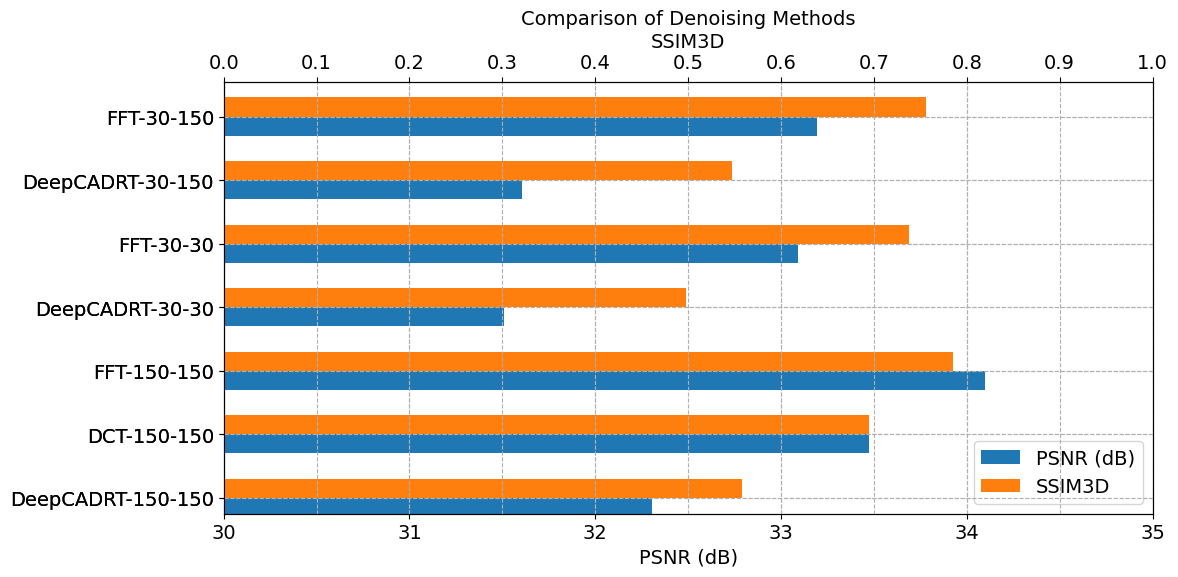

In [13]:
# DCT is frame3000_win6000_s036_δs72_t0
# FFT is frame3000_alphas0.85
df = pd.DataFrame(
    {
        "PSNR (dB)": {
            "DeepCADRT-150-150": 32.3038,
            "DCT-150-150": 33.47127,
            "FFT-150-150": 34.09738,
            
            "DeepCADRT-30-30": 31.5092393,
            "FFT-30-30": 33.0915,
            
            "DeepCADRT-30-150": 31.604510,
            "FFT-30-150": 33.1949,
        },
        "SSIM3D": {
            "DeepCADRT-150-150": 0.5577,
            "DCT-150-150": 0.694209,
            "FFT-150-150": 0.78490,
            
            "DeepCADRT-30-30": 0.498140,
            "FFT-30-30": 0.737839,
            
            "DeepCADRT-30-150": 0.547368,
            "FFT-30-150": 0.75576,            
        },
    }
)
plot(df)